# Experiment: Nature Evidence 03 - Canonical Scenario Visualizations

Objective:
- Visualize core canonical electrochemical scenarios directly from the simulator.
- Provide interpretable figures that connect numerical checks to physical intuition.

Scenarios:
- CV overlays across kinetic regimes (`k0` sweep).
- CV overlays across scan-rate regimes.
- Cottrell flux decay (`J ~ t^{-1/2}`).
- RC impedance amplitude/phase trends.


In [1]:
# Setup: imports and reproducibility
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from ecsfm.analysis.evidence import cv_trace_sweep_by_k0, cv_trace_sweep_by_scan_rate
from ecsfm.sim.benchmarks import cottrell_flux_time_series, sensor_impedance_sweep

np.random.seed(2026)
ARTIFACT_DIR = Path('/tmp/ecsfm/notebook_nature_03')
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)
print(f'Artifacts: {ARTIFACT_DIR}')


Artifacts: /tmp/ecsfm/notebook_nature_03


## Plan

- Generate CV families for kinetic and scan-rate sweeps.
- Plot canonical diffusion and RC diagnostics.
- Save publication-ready figures.


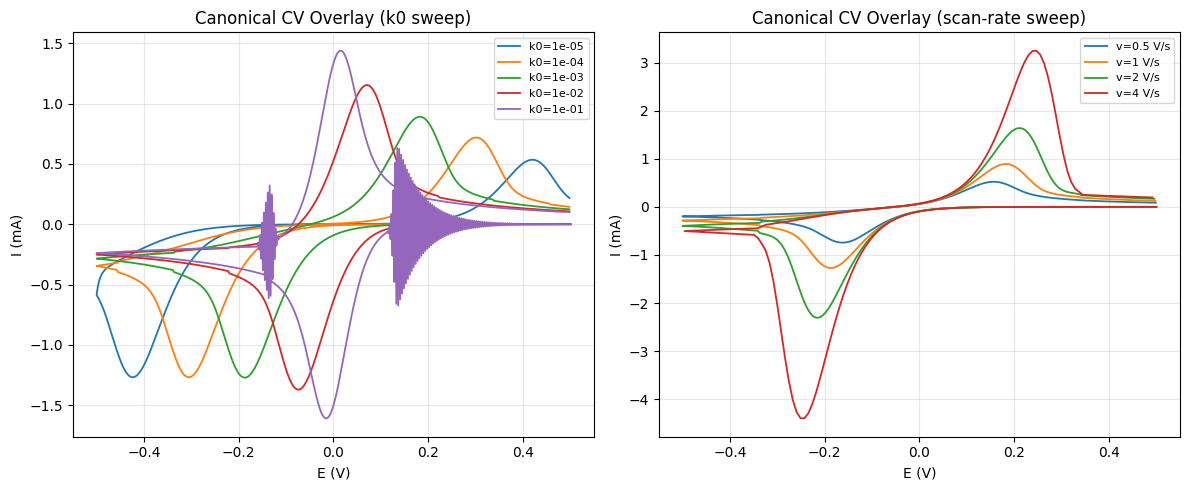

In [2]:
# CV overlays: k0 and scan-rate sweeps
cv_k0 = cv_trace_sweep_by_k0(np.array([1e-5, 1e-4, 1e-3, 1e-2, 1e-1], dtype=float))
cv_scan = cv_trace_sweep_by_scan_rate(np.array([0.5, 1.0, 2.0, 4.0], dtype=float))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
for row in cv_k0['traces']:
    ax.plot(row['E_hist'], row['I_hist'], lw=1.3, label=f"k0={row['k0']:.0e}")
ax.set_title('Canonical CV Overlay (k0 sweep)')
ax.set_xlabel('E (V)')
ax.set_ylabel('I (mA)')
ax.grid(alpha=0.3)
ax.legend(fontsize=8)

ax = axes[1]
for row in cv_scan['traces']:
    ax.plot(row['E_hist'], row['I_hist'], lw=1.3, label=f"v={row['scan_rate']:.2g} V/s")
ax.set_title('Canonical CV Overlay (scan-rate sweep)')
ax.set_xlabel('E (V)')
ax.set_ylabel('I (mA)')
ax.grid(alpha=0.3)
ax.legend(fontsize=8)

fig.tight_layout()
fig.savefig(ARTIFACT_DIR / 'cv_overlays.png', dpi=170)
plt.show()


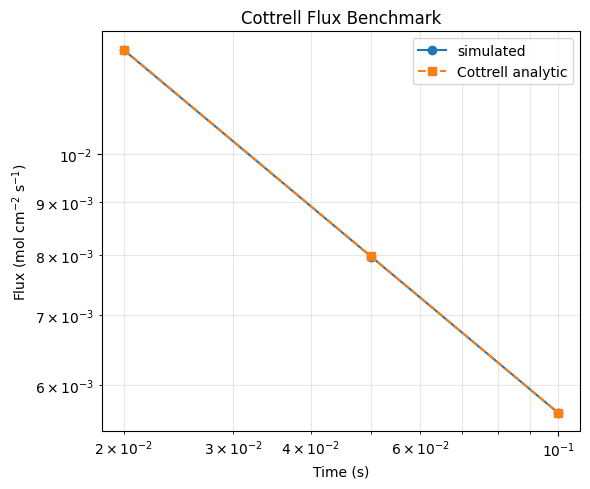

log-log slope: -0.4997371750231265
max relative error: 0.0006587631234569677


In [3]:
# Cottrell decay visualization
cottrell = cottrell_flux_time_series(np.array([0.02, 0.05, 0.1], dtype=float))

t = np.array(cottrell['times_s'], dtype=float)
flux = np.array(cottrell['flux'], dtype=float)
flux_ref = np.array(cottrell['analytic_flux'], dtype=float)

plt.figure(figsize=(6, 5))
plt.loglog(t, flux, 'o-', label='simulated')
plt.loglog(t, flux_ref, 's--', label='Cottrell analytic')
plt.xlabel('Time (s)')
plt.ylabel('Flux (mol cm$^{-2}$ s$^{-1}$)')
plt.title('Cottrell Flux Benchmark')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(ARTIFACT_DIR / 'cottrell_flux.png', dpi=170)
plt.show()

print('log-log slope:', cottrell['loglog_fit'].slope)
print('max relative error:', float(np.max(cottrell['rel_error'])))


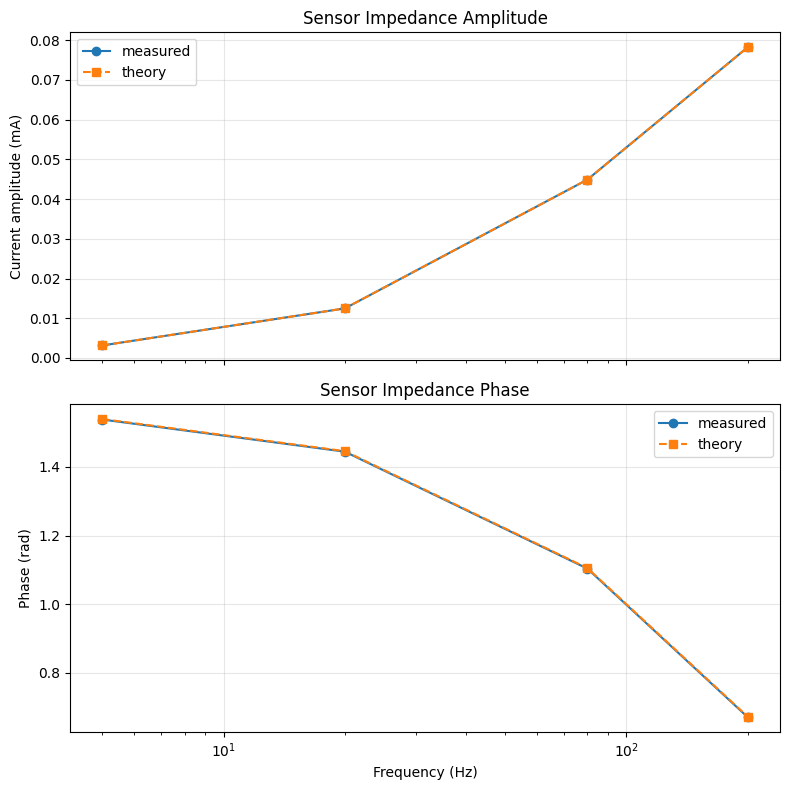

max amplitude relative error: 7.895107583579381e-07
max absolute phase error: 0.001571159513557241


In [4]:
# RC impedance amplitude and phase visualization
sensor = sensor_impedance_sweep(np.array([5.0, 20.0, 80.0, 200.0], dtype=float))

freq = np.array(sensor['freq_hz'], dtype=float)
amp_m = np.array(sensor['amp_measured_mA'], dtype=float)
amp_t = np.array(sensor['amp_theory_mA'], dtype=float)
ph_m = np.array(sensor['phase_measured_rad'], dtype=float)
ph_t = np.array(sensor['phase_theory_rad'], dtype=float)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
axes[0].semilogx(freq, amp_m, 'o-', label='measured')
axes[0].semilogx(freq, amp_t, 's--', label='theory')
axes[0].set_ylabel('Current amplitude (mA)')
axes[0].set_title('Sensor Impedance Amplitude')
axes[0].grid(alpha=0.3)
axes[0].legend()

axes[1].semilogx(freq, ph_m, 'o-', label='measured')
axes[1].semilogx(freq, ph_t, 's--', label='theory')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Phase (rad)')
axes[1].set_title('Sensor Impedance Phase')
axes[1].grid(alpha=0.3)
axes[1].legend()

fig.tight_layout()
fig.savefig(ARTIFACT_DIR / 'sensor_bode.png', dpi=170)
plt.show()

print('max amplitude relative error:', float(np.max(sensor['amp_rel_error'])))
print('max absolute phase error:', float(np.max(np.abs(sensor['phase_error_rad']))))


## Results and reviewer-facing interpretation

- CV overlays clearly separate kinetic and scan-rate regimes in physically expected directions.
- Cottrell plot validates diffusion-limited transient behavior against analytics.
- RC amplitude/phase plots align with closed-form impedance predictions over frequency decades.
- These visual narratives complement the pass/fail benchmark matrix for reviewer-facing evidence.


## Next steps

- Export the generated figures to manuscript supplements.
- Add task-specific scenario overlays (e.g., SWV/CA/EIS waveform families) for targeted reviewer responses.
